### Data Analysis on employees Attrition

*Business Problem*: What could be the major reason for employees attrition in a Country?

We explore a given Data set to find out the factors that affect employees leaving or resigning from their work

Having understood the business problem, the next stage is to source for the Data.

The data used here was downloaded from <Kaggle.com>. Kaggle is an Open source with over 1000 data set that is readily available to be used.

So we begin by importing the needed libraries like the pandas and seaborn for the Analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

After downloading the libraries to be used, we then import our data and use the pandas library to read the dataframe

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Next we explore the data to find out for missing values

We also check the size of the data and the information about our data

In [3]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [4]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [6]:
categorical = df.select_dtypes('O')
categorical_columns = categorical.columns
print(categorical_columns)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


There are 9 categorical columns in the Data.

There are no missing values in the data.

Thus the data set is clean and ready for Analysis.

There are 1470 rows and 35 columns in our data set. 

We check the summary of our Data set excluding the categorical variables

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In our data set, we have a column for the Attrition which contains "Yes" or "No". Yes for those who left and No for those who did not. 

We can also see that the Average or mean age of the Employees in the data set is 36 years.

We also see that the minimum age of all employeesis 18 and maximum is 60 years. 

The average standard working hours is 80 hours per week

We now check for the number of Employees that Attrited 

In [10]:
attrited_num = df.shape[0] - df[df['Attrition'] == 'No'].count()[0]
attrited_num

237

237 Emplolyees attrited. While 1233 employees did not leave the company

Now we find the percentage of attrition

In [11]:
attrition_percentage = df['Attrition'].value_counts()/df.shape[0] * 100
attrition_percentage

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

Approximately 84% of the Employees did not leave the Company. While the remaining 16% left the Company

We plot some visualization to properly explore the data

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-p

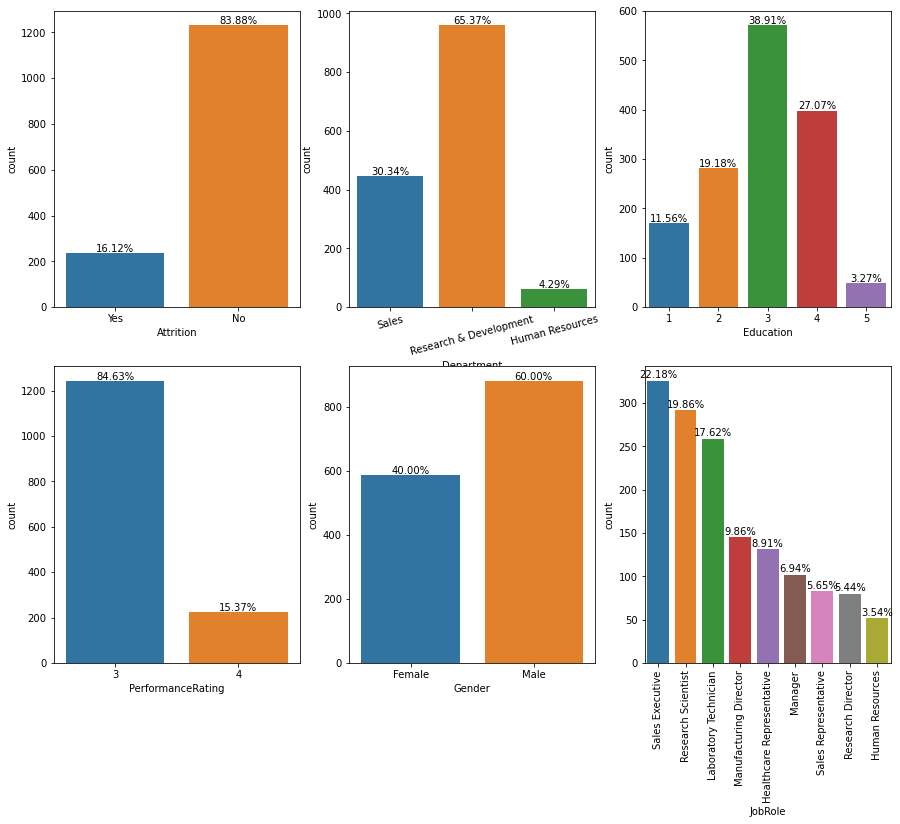

In [12]:
catt = ['Attrition', 'Department', 'Education', 'PerformanceRating', 'Gender', 'JobRole', 'Overtime']


def pltCountplot(catt):
    
    fig, axis = plt.subplots(len(catt) // 3,3, figsize=(15,12))  

    index = 0
    for i in range(len(catt) // 3):
        for j in range(3):
            
            ax = sns.countplot(catt[index], data=df, ax=axis[i][j])
            
            if catt[index] in ['JobRole']:
                for item in ax.get_xticklabels():
                    item.set_rotation(90)
            if catt[index] in ['Department']:
                 for item in ax.get_xticklabels():
                    item.set_rotation(15)
                
            for p in ax.patches:
                height = p.get_height() 
                ax.text(p.get_x()+p.get_width()/2.,
                        height + 3,
                        '{:1.2f}%'.format(height/len(df)*100),
                        ha="center") 
            index += 1
pltCountplot(catt)

From the plots above, we have majority of the Employees who are Sales Executive.

Employees with performance rating of 3 is the highest.

We have  more employees in the  Reseach & Development department

We have more Employees with Education level3 


So next we explore the Gender and check the number of males and females that attritted respectively

In [13]:
df.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [14]:
attrition_numb_gender_df =  df.groupby(by = ['Attrition', 'Gender']).count()
attrition_numb_gender_df

Age  BusinessTravel  DailyRate  Department  \
Attrition Gender                                               
No        Female  501             501        501         501   
          Male    732             732        732         732   
Yes       Female   87              87         87          87   
          Male    150             150        150         150   

                  DistanceFromHome  Education  EducationField  EmployeeCount  \
Attrition Gender                                                               
No        Female               501        501             501            501   
          Male                 732        732             732            732   
Yes       Female                87         87              87             87   
          Male                 150        150             150            150   

                  EmployeeNumber  EnvironmentSatisfaction  ...  \
Attrition Gender                                           ...   
No        Female             501                      501  ...   
          Male               732                      732  ...   
Yes       Female              87                       87  ...   
          Male               150                      150  ...   

                  RelationshipSatisfaction  StandardHours  StockOptionLevel  \
Attrition Gender                                                              
No        Female                       501            501               501   
          Male                         732            732               732   
Yes       Female                        87             87                87   
          Male                         150            150               150   

                  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
Attrition Gender                                                              
No        Female                501                    501              501   
          Male                  732                    732              732   
Yes       Female                 87                     87               87   
          Male                  150                    150              150   

                  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
Attrition Gender                                                                
No        Female             501                 501                      501   
          Male               732                 732                      732   
Yes       Female              87                  87                       87   
          Male               150                 150                      150   

                  YearsWithCurrManager  
Attrition Gender                        
No        Female                   501  
          Male                     732  
Yes       Female                    87  
          Male                     150  

[4 rows x 33 columns]

In [15]:
attrit_gend_female = df[(df['Gender'] == 'Female') & (df['Attrition'] == 'Yes')].count()[0]
attrit_gend_male = df[(df['Gender'] == 'Male') & (df['Attrition'] == 'Yes')].count()[0]


print(attrit_gend_female)
print(attrit_gend_male)

87
150


In [16]:
no_attrit_gend_female = df[(df['Gender'] == 'Female') & (df['Attrition'] == 'No')].count()[0]
no_attrit_gend_male = df[(df['Gender'] == 'Male') & (df['Attrition'] == 'No')].count()[0]

print(no_attrit_gend_female)
print(no_attrit_gend_male)

501
732


From the above, we discover that there are 588 female workers, out of which 87 of them attrited and 501 remained at the Company

We also found out that there are 882 male workers, out of which 150 of them attrited and 732 remained at the Company.

Now we get their percentages

In [55]:
attrition_gend_percentage = (df.groupby(by = ['Attrition', 'Gender']).count()/df['Attrition'].count().sum())*100
attrition_gend_percentage

Age  BusinessTravel  DailyRate  Department  \
Attrition Gender                                                     
No        Female  34.081633       34.081633  34.081633   34.081633   
          Male    49.795918       49.795918  49.795918   49.795918   
Yes       Female   5.918367        5.918367   5.918367    5.918367   
          Male    10.204082       10.204082  10.204082   10.204082   

                  DistanceFromHome  Education  EducationField  EmployeeCount  \
Attrition Gender                                                               
No        Female         34.081633  34.081633       34.081633      34.081633   
          Male           49.795918  49.795918       49.795918      49.795918   
Yes       Female          5.918367   5.918367        5.918367       5.918367   
          Male           10.204082  10.204082       10.204082      10.204082   

                  EmployeeNumber  EnvironmentSatisfaction  ...  \
Attrition Gender                                           ...   
No        Female       34.081633                34.081633  ...   
          Male         49.795918                49.795918  ...   
Yes       Female        5.918367                 5.918367  ...   
          Male         10.204082                10.204082  ...   

                  RelationshipSatisfaction  StandardHours  StockOptionLevel  \
Attrition Gender                                                              
No        Female                 34.081633      34.081633         34.081633   
          Male                   49.795918      49.795918         49.795918   
Yes       Female                  5.918367       5.918367          5.918367   
          Male                   10.204082      10.204082         10.204082   

                  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
Attrition Gender                                                              
No        Female          34.081633              34.081633        34.081633   
          Male            49.795918              49.795918        49.795918   
Yes       Female           5.918367               5.918367         5.918367   
          Male            10.204082              10.204082        10.204082   

                  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
Attrition Gender                                                                
No        Female       34.081633           34.081633                34.081633   
          Male         49.795918           49.795918                49.795918   
Yes       Female        5.918367            5.918367                 5.918367   
          Male         10.204082           10.204082                10.204082   

                  YearsWithCurrManager  
Attrition Gender                        
No        Female             34.081633  
          Male               49.795918  
Yes       Female              5.918367  
          Male               10.204082  

[4 rows x 33 columns]

In [22]:
attrit_gend_female_perc = (df[(df['Gender'] == 'Female') & (df['Attrition'] == 'Yes')].count()[0])/df['Attrition'].count() * 100
attrit_gend_male_perc = (df[(df['Gender'] == 'Male') & (df['Attrition'] == 'Yes')].count()[0])/df['Attrition'].count() * 100

print(round(attrit_gend_female_perc), "%")
print(round(attrit_gend_male_perc), "%")

6 %
10 %


In [23]:
no_attrit_gend_female_perc = (df[(df['Gender'] == 'Female') & (df['Attrition'] == 'No')].count()[0])/df['Attrition'].count() * 100
no_attrit_gend_male_perc = (df[(df['Gender'] == 'Male') & (df['Attrition'] == 'No')].count()[0])/df['Attrition'].count() * 100

print(round(no_attrit_gend_female_perc), "%")
print(round(no_attrit_gend_male_perc), "%")

34 %
50 %


Approximately 6% of female workers left their jobs, While Only about 10% of the Males left their jobs.

Approximately 34% of the females did not leave their jobs while about 50% of the Male workers did not leave their jobs

Now let's plot a visualization that shows the percentage of attrition in the Job Role, Education, Department, Performance Rating,etc

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-p

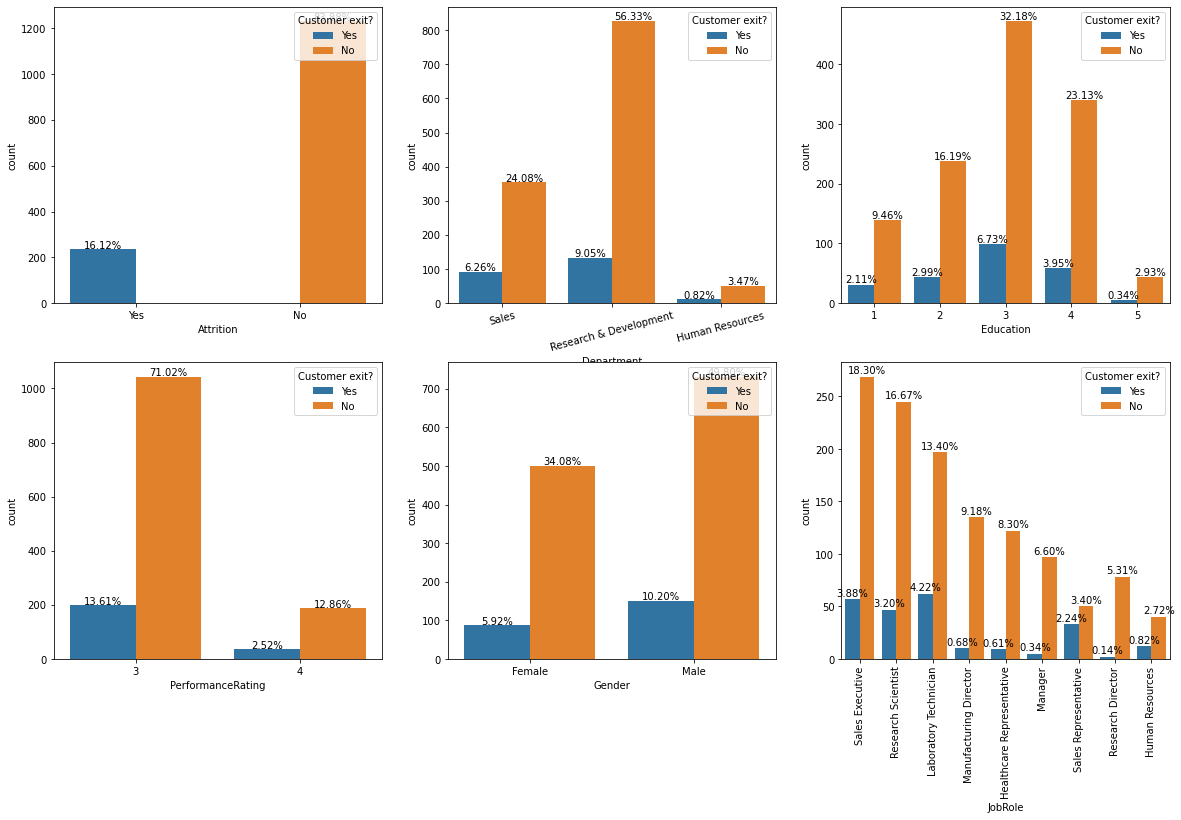

In [24]:
def pltCountplotHueTarget(catt, target):
    
    fig, axis = plt.subplots(len(catt) // 3,3, figsize=(20,12))  

    index = 0
    for i in range(len(catt) // 3):
        for j in range(3):
            
            ax = sns.countplot(catt[index], data=df, hue=target, ax=axis[i][j])
            
            ax.legend(title='Customer exit?',
                      loc='upper right',
                      labels=['Yes', 'No'])
            
            if catt[index] in ['Department']:
                for item in ax.get_xticklabels():
                    item.set_rotation(15)
            if catt[index] in ['JobRole']:
                for item in ax.get_xticklabels():
                    item.set_rotation(90)
                
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,
                        height + 3,
                        '{:1.2f}%'.format(height/len(df)*100),
                        ha="center") 
            index += 1



pltCountplotHueTarget(catt, 'Attrition')

Now We compare their Ages and Daily Rate using the Scatter plot from the seaborn packages

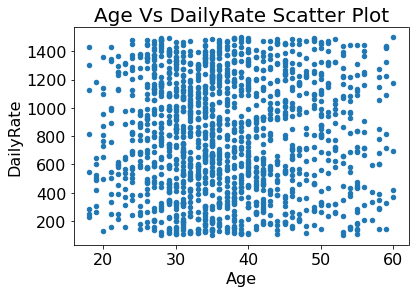

In [25]:
df.plot(kind = 'scatter', x ='Age', y ='DailyRate', fontsize = 16)
plt.xlabel ('Age', fontsize = 16)
plt.ylabel('DailyRate', fontsize = 16)

plt.title('Age Vs DailyRate Scatter Plot', fontsize = 20)
plt.show()

From our scatter plot We see that Daily Rate is highly dense between Ages 30 to 40. This means that we have more Employees between the ages 30 and 40.

Next is to plot a histogram of the Total Working Years

<AxesSubplot:ylabel='Frequency'>

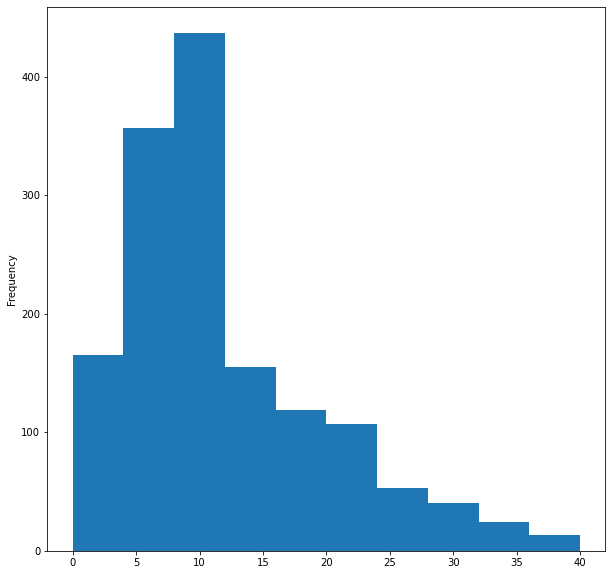

In [26]:
df.TotalWorkingYears.plot(kind = 'hist', 
                          bins = 10, 
                          figsize = (10, 10))

We see from our Histogram that the total working years is highest in 5 to 10. This means that More Employees work more between 5 to 10 years in a Company

Next we check the Monthly Income Vs Gender so as to see how the group differ in monthly income. To do this, we use the boxplot to show this comparison

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


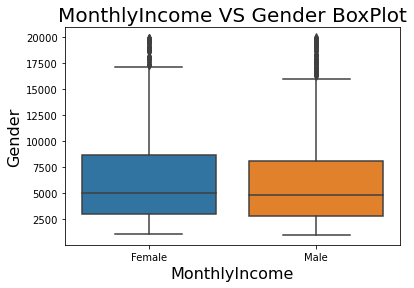

In [27]:
sns.boxplot(df['Gender'], df['MonthlyIncome'])

plt.title('MonthlyIncome VS Gender BoxPlot', fontsize = 20)
plt.xlabel('MonthlyIncome', fontsize = 16)
plt.ylabel('Gender', fontsize = 16)

plt.show()

From the box plot, we discover that the Average or mean salary is higher in the female than the male. The implication is that the we have female employees who earn more than the Males.

It is also possible that the highest payed Employee is a female

We plot a count plot to check the highest job levels of employees

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


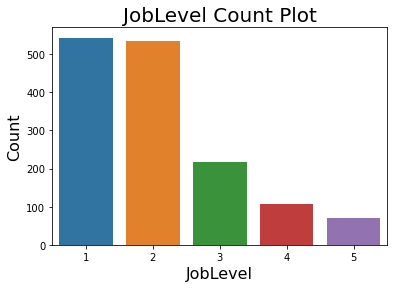

In [28]:
sns.countplot(df.JobLevel)
plt.title('JobLevel Count Plot', fontsize = 20)
plt.xlabel('JobLevel', fontsize = 16)
plt.ylabel('Count', fontsize = 16)

plt.show()

From our plot, we discover that the largest population for job level is between 1 and 2

Now we check to see if the Distance from Home affects the Employees attrition


<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

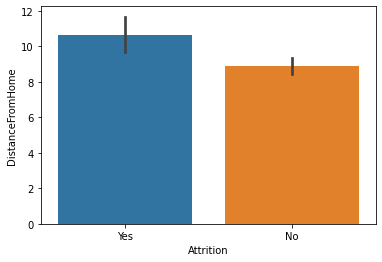

In [29]:
sns.barplot(x = 'Attrition', 
            y = 'DistanceFromHome', 
            data = df)

from the plot above we discovered that Employees are most likely to quit when distance from home is betwen 9 and 12.

Now we check the data to find out if the Age is normally distributed

In [30]:
df['Gender'][df['MonthlyIncome'] ==  df['MonthlyIncome'].max()]

190    Male
Name: Gender, dtype: object

In [33]:
df['Gender'][df['MonthlyIncome']== df['MonthlyIncome'].min()]

513    Male
Name: Gender, dtype: object

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


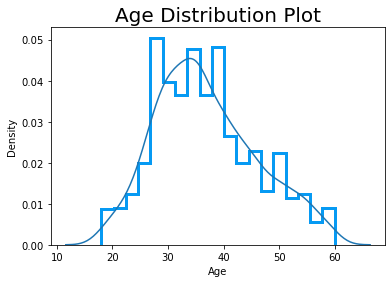

In [34]:
sns.distplot(df.Age, kde = True, 
             label = 'YearInCurrentRole', 
             hist_kws = {"histtype": "step", "linewidth": 3, "alpha": 1,
                                                                         "color" : sns.xkcd_rgb["azure"]})
plt.title('Age Distribution Plot', fontsize = 20)
plt.show()

From our distribution plot, we can see that the Age is normally distributed and also the mean age is around 36 years

Now we show the pie chart of Employees. This charts tells us the population of male employees to female employees

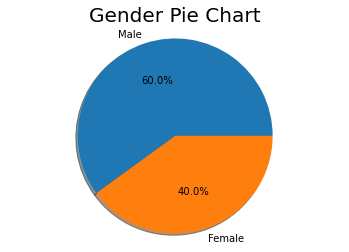

In [35]:
labels = ['Male', 'Female']

sizes = [df.Gender.value_counts()[0],
        df.Gender.value_counts()[1]]

fig, ax = plt.subplots()
ax.pie(sizes, labels = labels, autopct  ='%1.1f%%', shadow = True)
ax.axis('equal')
plt.title('Gender Pie Chart', size = 20)
plt.show()

We see from the pie chart that the proportion of male employees is higher than that of the female.

Next we plot the distribution plot of Years with current Manager, Years at the Company and Years in current role

We also plot the point plot to show the relationship between the TotalWorkingYears and Gender with respect to Attrition

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

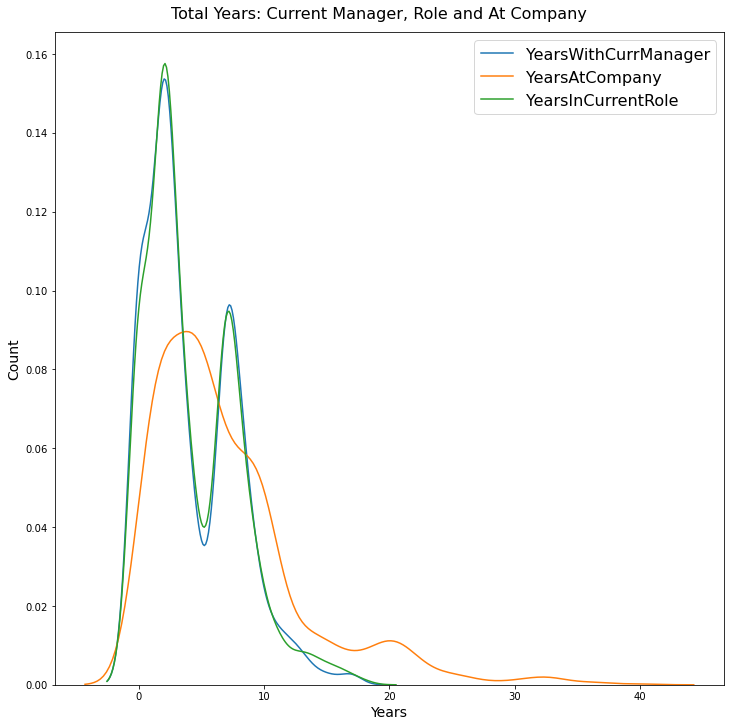

In [36]:
fig = plt.figure(figsize = (12, 12))

sns.distplot(df.YearsWithCurrManager, hist = False, kde = True, label = 'YearsWithCurrManager', hist_kws = {"histtype" : "step",
                                                                                                             "linswidth" : 3, "alpha": 1,
                                                                                                             "color" : sns.xkcd_rgb["azure"]})


sns.distplot(df.YearsAtCompany, hist = False, kde = True, label = 'YearsAtCompany', hist_kws = {"histtype" : "step",
                                                                                                             "linswidth" : 3, "alpha": 1,
                                                                                                             "color" : sns.xkcd_rgb["dark blue green"]})

sns.distplot(df.YearsInCurrentRole, hist = False, kde = True, label = 'YearsInCurrentRole', hist_kws = {"histtype" : "step",
                                                                                                             "linswidth" : 3, "alpha": 1,
                                                                                                             "color" : sns.xkcd_rgb["fuchsia"]})

plt.suptitle('Total Years: Current Manager, Role and At Company', fontsize = 16, x = 0.5, y = 0.91)

plt.xlabel('Years', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

plt.legend(prop={'size' : 16}, loc = 1)

plt.show()

<AxesSubplot:xlabel='Gender', ylabel='TotalWorkingYears'>

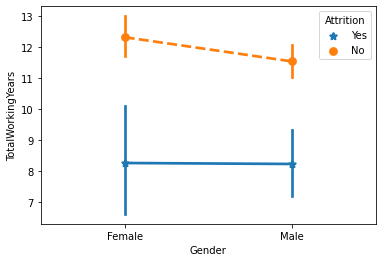

In [37]:
sns.pointplot(x = 'Gender', y = 'TotalWorkingYears', hue = 'Attrition', data = df, 
             pallete = {"Yes": "blue", "No" : "pink"}, 
             markers = ["*", "o"], 
             linestyles =["-", "--"])

From the plots above we discover that both male and female with Total Working Years between 11 to 13 are less likely to quit

In other words, Employees with less than 11 Total working Years are more likely to quit


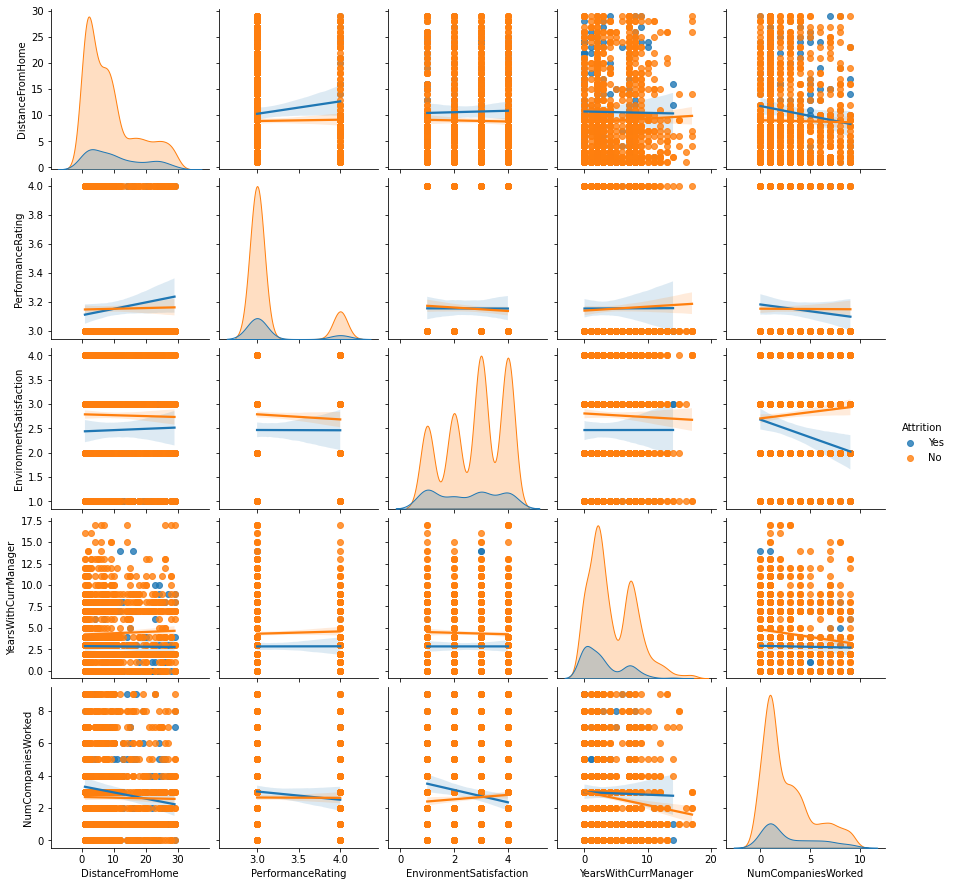

In [38]:
catts = ['DistanceFromHome', 'PerformanceRating', 'EnvironmentSatisfaction', 'Attrition', 'YearsWithCurrManager', 
        'NumCompaniesWorked']

sns.pairplot(df[catts], kind = "reg", diag_kind = "kde", hue =  'Attrition')

plt.show()

####  From the plots above, Employees falling under the categories below are more likely to quit

 'PerformanceRating' between 3.0 and 4.0
 
'DistanceFromHome' between 10 and 15

'YearsWithCurrManager' less than 5

'EnvironmentalSatisfaction' between 2.4 and 3.0

Next we plot a correlation map for all numerical variables

<AxesSubplot:>

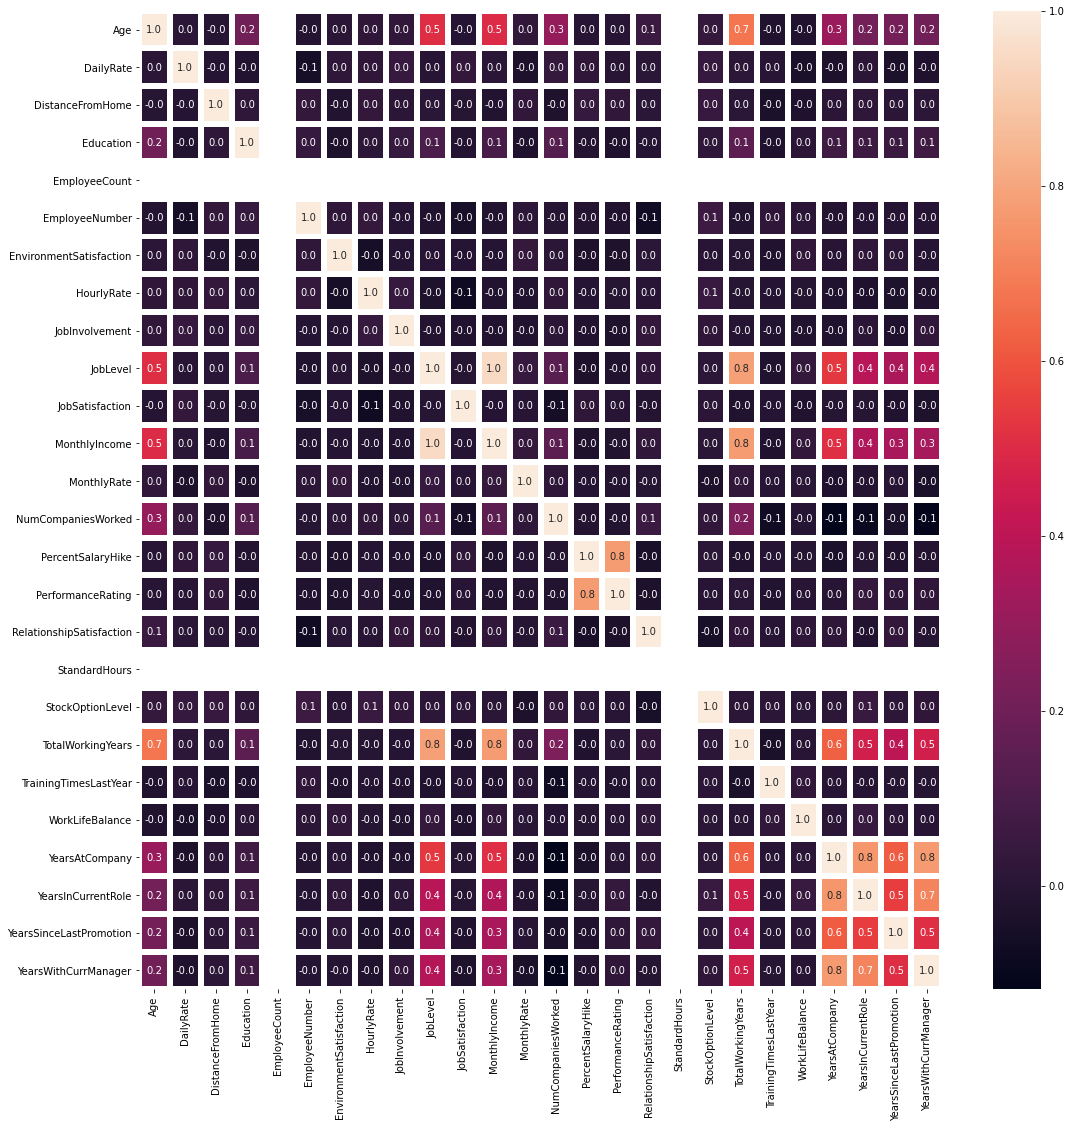

In [39]:
fig, ax = plt.subplots(figsize = (18, 18))

sns.heatmap(df.corr(), annot = True, linewidth = 5, fmt = '.1f', ax = ax)

###### There is high correlation (>=0.7) between variables as described below

Monthly Income to Job level  (1.0)

Monthly Income to Total Working Years (0.8)

Performance Rating to Performance Salary Hike (0.8)

Years in company to Years with current manager (0.8)

Years in company to Years in current role (0.8)

Job level to Total working hours (0.8)

monthly income to Total working hours (0.8)

Age to total working hours (0.7)

Years with current Manager to Years in current role (0.7)

Next we build our machine learning model that will predict Employee's attrition given some features.

But before we do that, we would need to check the correlation of our data set again. 

We convert the Attrition column to Numeric using the pandas method "get dummies".

#### Next we build our Machine Learning models 

We drop some columns that have just one values in the role. The columns are: "EmployeeCount", "Over18" and "StandardHours"

We build a prediction algorithm to predict if Customers will Attrit or not.

Some of the models we test with are:

-Logistic Regression

-Decision Tree Classifier

-K-Nearest Neighbor

-Random Forest Classifier

We will import the libraries and packages needed for the machine learning models the sci kit learn packages.

Before we build, we use the LabelEncoder or OneHotEncoder packages to turn strings to integers so that the model can predict accurately using 'recall' as our means of scoring or accuracy.

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, make_scorer
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample

In [42]:
le = LabelEncoder()
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df['Department'] = le.fit_transform(df['Department'])
df['EducationField'] = le.fit_transform(df['EducationField'])
df['Gender'] = le.fit_transform(df['Gender'])
df['JobRole'] = le.fit_transform(df['JobRole'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['OverTime'] = le.fit_transform(df['OverTime'])
df['Attrition'] = le.fit_transform(df['Attrition'])

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [43]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
# transformer = ColumnTransformer([
#     ('one hot', OneHotEncoder(drop = 'first'), ['BusinessTravel', 'Department', 'EducationField', 'Gender',
#                                                 'JobRole', 'MaritalStatus', 'OverTime']),
# ], remainder = 'passthrough')

In [45]:
df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'], inplace=True)

We initialize our X and y

In [47]:
X = df[df.columns[~df.columns.isin(['Attrition'])]]
scaler = StandardScaler()
X = scaler.fit_transform(X)
# X = df.drop('Attrition', axis = 1, inplace = True)
y = df['Attrition']
print(X.shape)
print(y.shape)


(1470, 31)
(1470,)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 3131)

LR = LogisticRegression(solver = 'liblinear')
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state = 3131)
RF =  RandomForestClassifier(random_state = 3131)

model_lr = make_pipeline(LR)
model_knn = make_pipeline(knn)
model_tree =  make_pipeline(tree)
model_rf =  make_pipeline(RF)

def model_evaluation(model, metric):
    skfold = StratifiedKFold(n_splits = 5)
    model_cv = cross_val_score(model, X_train, y_train, cv = skfold, scoring = metric)
    return model_cv


model_lr_cv = model_evaluation(model_lr, 'recall')
model_knn_cv = model_evaluation(model_knn, 'recall')
model_tree_cv = model_evaluation(model_tree, 'recall')
model_rf_cv = model_evaluation(model_rf, 'recall')


for model in [model_lr, model_knn, model_tree, model_rf]:
    model.fit(X_train, y_train)
    
yhat1 = model_lr.predict(X_test)
yhat2 = model_knn.predict(X_test)
yhat3 = model_tree.predict(X_test)
yhat4 = model_rf.predict(X_test)

score_mean = [model_lr_cv.mean(), model_knn_cv.mean(), model_tree_cv.mean(), model_rf_cv.mean()]
score_std = [model_lr_cv.std(), model_knn_cv.std(), model_tree_cv.std(), model_rf_cv.std()]

score_recall_score = [recall_score(y_test, yhat1),
                      recall_score(y_test, yhat2),
                      recall_score(y_test, yhat3),
                      recall_score(y_test, yhat4)]

 We check the summary of our CV

In [51]:
method_name = ['Logistic Regression', 'Decision Tree Classifier', 'KNN Classifier', 'Random Forest Classifier']
cv_summary = pd.DataFrame({
    'method': method_name,
    'mean score': score_mean,
    'std score': score_std,
    'recall score': score_recall_score
})
cv_summary

,method,mean score,std score,recall score
0,Logistic Regression,0.361141,0.084075,0.352113
1,Decision Tree Classifier,0.102317,0.040813,0.126761
2,KNN Classifier,0.385205,0.059094,0.295775
3,Random Forest Classifier,0.114439,0.035245,0.154930


From the model i can choose the Logistic Regression because it has the highest recall. But the score is still not good enough.

This is because the dataset is not balance so i will do some resampling.

I will begin by Upsampling my dataset

Afterwards i will do the undersampling

In [55]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, yhat1))
print(accuracy_score(y_test, yhat2))
print(accuracy_score(y_test, yhat3))
print(accuracy_score(y_test, yhat4))

0.8752834467120182
0.8458049886621315
0.7936507936507936
0.8639455782312925


In [56]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2


In [61]:
not_attrit = df[df.Attrition == 0]
attrit = df[df.Attrition == 1]

print(attrit.shape)
print(not_attrit.shape)

(237, 32)
(1233, 32)


In [71]:
upsampled_attrit =  resample(attrit,
                          replace=True, # sample with replacement
                          n_samples=len(not_attrit), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_attrit, upsampled_attrit])

# check new class counts
upsampled.Attrition.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

In [73]:
X_train  = upsampled[upsampled.columns[~upsampled.columns.isin(['Attrition'])]]
y_train = upsampled.Attrition

print(X_train.shape)
print(y_train.shape)

(2466, 31)
(2466,)


In [74]:
LR = LogisticRegression(solver = 'liblinear')
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state = 3131)
RF =  RandomForestClassifier(random_state = 3131)

model_lr = make_pipeline(LR)
model_knn = make_pipeline(knn)
model_tree =  make_pipeline(tree)
model_rf =  make_pipeline(RF)

def model_evaluation(model, metric):
    skfold = StratifiedKFold(n_splits = 5)
    model_cv = cross_val_score(model, X_train, y_train, cv = skfold, scoring = metric)
    return model_cv


model_lr_cv = model_evaluation(model_lr, 'recall')
model_knn_cv = model_evaluation(model_knn, 'recall')
model_tree_cv = model_evaluation(model_tree, 'recall')
model_rf_cv = model_evaluation(model_rf, 'recall')


for model in [model_lr, model_knn, model_tree, model_rf]:
    model.fit(X_train, y_train)
    
yhat1 = model_lr.predict(X_test)
yhat2 = model_knn.predict(X_test)
yhat3 = model_tree.predict(X_test)
yhat4 = model_rf.predict(X_test)

score_mean = [model_lr_cv.mean(), model_knn_cv.mean(), model_tree_cv.mean(), model_rf_cv.mean()]
score_std = [model_lr_cv.std(), model_knn_cv.std(), model_tree_cv.std(), model_rf_cv.std()]

score_recall_score = [recall_score(y_test, yhat1),
                      recall_score(y_test, yhat2),
                      recall_score(y_test, yhat3),
                      recall_score(y_test, yhat4)]

In [75]:
method_name = ['Logistic Regression', 'Decision Tree Classifier', 'KNN Classifier', 'Random Forest Classifier']
cv_summary = pd.DataFrame({
    'method': method_name,
    'mean score': score_mean,
    'std score': score_std,
    'recall score': score_recall_score
})
cv_summary

,method,mean score,std score,recall score
0,Logistic Regression,0.755893,0.033768,0.845070
1,Decision Tree Classifier,0.910819,0.025130,1.000000
2,KNN Classifier,0.991886,0.006788,0.647887
3,Random Forest Classifier,0.992696,0.005968,0.253521


After upsampling the data, the recall score of the Logistic regression seem to have improved a bit.

But i will try the same process by downsampling the data again to see if i'd get a better recall score

In [76]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, yhat1))
print(accuracy_score(y_test, yhat2))
print(accuracy_score(y_test, yhat3))
print(accuracy_score(y_test, yhat4))

0.5102040816326531
0.16099773242630386
0.26303854875283444
0.8321995464852607


In [78]:
downsampled_not_attrit = resample(not_attrit,
                                  n_samples = len(attrit),
                                  random_state = 27)

downsampled = pd.concat([attrit, downsampled_not_attrit])

downsampled.Attrition.value_counts()

1    237
0    237
Name: Attrition, dtype: int64

In [79]:
X_train = downsampled[downsampled.columns[~downsampled.columns.isin(['Attrition'])]]
y_train = downsampled['Attrition']

print(X_train.shape)
print(y_train.shape)

(474, 31)
(474,)


In [80]:
LR = LogisticRegression(solver = 'liblinear')
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state = 3131)
RF =  RandomForestClassifier(random_state = 3131)

model_lr = make_pipeline(LR)
model_knn = make_pipeline(knn)
model_tree =  make_pipeline(tree)
model_rf =  make_pipeline(RF)

def model_evaluation(model, metric):
    skfold = StratifiedKFold(n_splits = 5)
    model_cv = cross_val_score(model, X_train, y_train, cv = skfold, scoring = metric)
    return model_cv


model_lr_cv = model_evaluation(model_lr, 'recall')
model_knn_cv = model_evaluation(model_knn, 'recall')
model_tree_cv = model_evaluation(model_tree, 'recall')
model_rf_cv = model_evaluation(model_rf, 'recall')


for model in [model_lr, model_knn, model_tree, model_rf]:
    model.fit(X_train, y_train)
    
yhat1 = model_lr.predict(X_test)
yhat2 = model_knn.predict(X_test)
yhat3 = model_tree.predict(X_test)
yhat4 = model_rf.predict(X_test)

score_mean = [model_lr_cv.mean(), model_knn_cv.mean(), model_tree_cv.mean(), model_rf_cv.mean()]
score_std = [model_lr_cv.std(), model_knn_cv.std(), model_tree_cv.std(), model_rf_cv.std()]

score_recall_score = [recall_score(y_test, yhat1),
                      recall_score(y_test, yhat2),
                      recall_score(y_test, yhat3),
                      recall_score(y_test, yhat4)]

In [81]:
method_name = ['Logistic Regression', 'Decision Tree Classifier', 'KNN Classifier', 'Random Forest Classifier']
cv_summary = pd.DataFrame({
    'method': method_name,
    'mean score': score_mean,
    'std score': score_std,
    'recall score': score_recall_score
})
cv_summary

,method,mean score,std score,recall score
0,Logistic Regression,0.661968,0.083165,0.760563
1,Decision Tree Classifier,0.574113,0.119986,1.000000
2,KNN Classifier,0.376418,0.238479,0.605634
3,Random Forest Classifier,0.418351,0.261009,1.000000


In [82]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, yhat1))
print(accuracy_score(y_test, yhat2))
print(accuracy_score(y_test, yhat3))
print(accuracy_score(y_test, yhat4))

0.6326530612244898
0.16099773242630386
0.6689342403628118
0.16326530612244897


Also, it seemed like our recall score reduced from the recall score we got when we upsampled our dataset.

This is because the data seem to be too small for the machine Learning to predict. Hence the reduction in value in Recall Score.

This clearly shows that the Logistic Regression is the best model for this classification